In [1]:
# Dependencies
import os
import requests
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

# this is for building custom legends for my plots
import matplotlib.lines as mlines

# Pretty Print
from pprint import pprint

In [2]:
# Import our movie data
filepath = os.path.join("Resources", "MovieData_Clean.csv")
df_IMDB = pd.read_csv(filepath)

# Display our dataframe
df_IMDB

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Awards,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions)
0,110681,Kings of the Evening,2008-01-01,0.0,98682.0,tt1006904,PG,99 min,Drama,Andrew P. Jones,...,8 wins & 1 nomination.,https://m.media-amazon.com/images/M/MV5BMjA3OT...,6.0,234,01 Nov 2010,Indican Pictures,Tuesday,January,2008,0.098682
1,26163,The Decline And Fall Of America,2008-01-01,7500.0,1200.0,tt1786696,NaN,120 min,Documentary,B.A. Brooks,...,NaN,https://m.media-amazon.com/images/M/MV5BMTMzNj...,5.2,13,NaN,NaN,Tuesday,January,2008,0.001200
2,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,NaN,https://m.media-amazon.com/images/M/MV5BNzUzYT...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336
3,6933,One Missed Call,2008-01-04,27.0,26.0,tt0479968,PG-13,87 min,"Horror, Mystery",Eric Valette,...,2 nominations.,https://m.media-amazon.com/images/M/MV5BMjA2NT...,4.0,"30,026",22 Apr 2008,Warner Bros. Pictures,Friday,January,2008,0.000026
4,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,NaN,https://m.media-amazon.com/images/M/MV5BMjE4MT...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,512200,Jumanji: The Next Level,2019-12-13,125000000.0,615882314.0,tt7975244,PG-13,123 min,"Action, Adventure, Comedy, Fantasy",Jake Kasdan,...,2 nominations.,https://m.media-amazon.com/images/M/MV5BOTVjMm...,7.0,"61,847",NaN,Sony Pictures,Friday,December,2019,615.882314
3315,536869,Cats,2019-12-20,95000000.0,36980175.0,tt5697572,PG,110 min,"Comedy, Drama, Family, Fantasy, Musical",Tom Hooper,...,Nominated for 1 Golden Globe. Another 1 win & ...,https://m.media-amazon.com/images/M/MV5BNjRlNT...,2.8,"20,921",NaN,NaN,Friday,December,2019,36.980175
3316,522212,Just Mercy,2019-12-25,0.0,10435988.0,tt4916630,PG-13,136 min,Drama,Destin Daniel Cretton,...,7 wins & 8 nominations.,https://m.media-amazon.com/images/M/MV5BYmM4Yz...,6.4,"1,551",NaN,Warner Bros. Pictures,Wednesday,December,2019,10.435988
3317,448119,Dolittle,2020-01-17,175000000.0,61184730.0,tt6673612,PG,101 min,"Action, Adventure, Comedy, Family, Fantasy",Stephen Gaghan,...,NaN,https://m.media-amazon.com/images/M/MV5BMDNkOD...,5.6,"4,762",NaN,Universal Pictures,Friday,January,2020,61.184730


In [3]:
# Rename some values in our dataset
df_IMDB.replace({"Rating":{"NOT RATED":"NR", "Not Rated":"NR", "UNRATED":"NR", "Unrated":"NR"}}, inplace=True)

# Clean the data to remove nulls and zeros from the plotted columns
# First, replace the NaN cells with zeros
df_IMDB["Rating"] = df_IMDB["Rating"].fillna("TV")

df_IMDB["Revenue"] = df_IMDB["Revenue"].fillna(0)
df_IMDB["Revenue"] = df_IMDB["Revenue"].astype(float)

df_IMDB["IMDB Rating"] = df_IMDB["IMDB Rating"].fillna(0)
df_IMDB["IMDB Rating"] = df_IMDB["IMDB Rating"].astype(float)

# Remove records with zeros in the Revenue and IMDB Rating columns
df_IMDB = df_IMDB[df_IMDB["IMDB Rating"] > 0]

# Remove all TV Shows and Made For TV movies
df_IMDB = df_IMDB[df_IMDB["Rating"].isin(["G", "PG", "PG-13", "NC-17", "R"])]

# Add color to our dataframe.  We will fill it later
df_IMDB["Color"] = pd.DataFrame({"Color": []})

# Display our dataframe
df_IMDB

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Color
0,110681,Kings of the Evening,2008-01-01,0.0,98682.0,tt1006904,PG,99 min,Drama,Andrew P. Jones,...,https://m.media-amazon.com/images/M/MV5BMjA3OT...,6.0,234,01 Nov 2010,Indican Pictures,Tuesday,January,2008,0.098682,NaN
2,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,https://m.media-amazon.com/images/M/MV5BNzUzYT...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336,NaN
3,6933,One Missed Call,2008-01-04,27.0,26.0,tt0479968,PG-13,87 min,"Horror, Mystery",Eric Valette,...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,4.0,"30,026",22 Apr 2008,Warner Bros. Pictures,Friday,January,2008,0.000026,NaN
4,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,https://m.media-amazon.com/images/M/MV5BMjE4MT...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615,NaN
5,7191,Cloverfield,2008-01-15,25000000.0,170764026.0,tt1060277,PG-13,85 min,"Horror, Sci-Fi, Thriller",Matt Reeves,...,https://m.media-amazon.com/images/M/MV5BZDNhND...,7.0,"358,331",22 Apr 2008,Paramount,Tuesday,January,2008,170.764026,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,512200,Jumanji: The Next Level,2019-12-13,125000000.0,615882314.0,tt7975244,PG-13,123 min,"Action, Adventure, Comedy, Fantasy",Jake Kasdan,...,https://m.media-amazon.com/images/M/MV5BOTVjMm...,7.0,"61,847",NaN,Sony Pictures,Friday,December,2019,615.882314,NaN
3315,536869,Cats,2019-12-20,95000000.0,36980175.0,tt5697572,PG,110 min,"Comedy, Drama, Family, Fantasy, Musical",Tom Hooper,...,https://m.media-amazon.com/images/M/MV5BNjRlNT...,2.8,"20,921",NaN,NaN,Friday,December,2019,36.980175,NaN
3316,522212,Just Mercy,2019-12-25,0.0,10435988.0,tt4916630,PG-13,136 min,Drama,Destin Daniel Cretton,...,https://m.media-amazon.com/images/M/MV5BYmM4Yz...,6.4,"1,551",NaN,Warner Bros. Pictures,Wednesday,December,2019,10.435988,NaN
3317,448119,Dolittle,2020-01-17,175000000.0,61184730.0,tt6673612,PG,101 min,"Action, Adventure, Comedy, Family, Fantasy",Stephen Gaghan,...,https://m.media-amazon.com/images/M/MV5BMDNkOD...,5.6,"4,762",NaN,Universal Pictures,Friday,January,2020,61.184730,NaN


In [4]:
# Add color to our dataframe records based on the Movie Rating (R, PG etc)
for index, movie in df_IMDB.iterrows():
    # Colors
    rating = movie["Rating"]
    if rating == "PG":
        color = "blue"
    elif rating == "PG-13":
        color = "yellow"
    elif rating == "NC-17":
        color = "orange"
    elif rating == "R":
        color = "red"
    else:
        color = "green"
    # end if
    
    df_IMDB.loc[index, "Color"] = color
# end for

df_IMDB

,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Color
0,110681,Kings of the Evening,2008-01-01,0.0,98682.0,tt1006904,PG,99 min,Drama,Andrew P. Jones,...,https://m.media-amazon.com/images/M/MV5BMjA3OT...,6.0,234,01 Nov 2010,Indican Pictures,Tuesday,January,2008,0.098682,blue
2,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,https://m.media-amazon.com/images/M/MV5BNzUzYT...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336,yellow
3,6933,One Missed Call,2008-01-04,27.0,26.0,tt0479968,PG-13,87 min,"Horror, Mystery",Eric Valette,...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,4.0,"30,026",22 Apr 2008,Warner Bros. Pictures,Friday,January,2008,0.000026,yellow
4,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,https://m.media-amazon.com/images/M/MV5BMjE4MT...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615,yellow
5,7191,Cloverfield,2008-01-15,25000000.0,170764026.0,tt1060277,PG-13,85 min,"Horror, Sci-Fi, Thriller",Matt Reeves,...,https://m.media-amazon.com/images/M/MV5BZDNhND...,7.0,"358,331",22 Apr 2008,Paramount,Tuesday,January,2008,170.764026,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,512200,Jumanji: The Next Level,2019-12-13,125000000.0,615882314.0,tt7975244,PG-13,123 min,"Action, Adventure, Comedy, Fantasy",Jake Kasdan,...,https://m.media-amazon.com/images/M/MV5BOTVjMm...,7.0,"61,847",NaN,Sony Pictures,Friday,December,2019,615.882314,yellow
3315,536869,Cats,2019-12-20,95000000.0,36980175.0,tt5697572,PG,110 min,"Comedy, Drama, Family, Fantasy, Musical",Tom Hooper,...,https://m.media-amazon.com/images/M/MV5BNjRlNT...,2.8,"20,921",NaN,NaN,Friday,December,2019,36.980175,blue
3316,522212,Just Mercy,2019-12-25,0.0,10435988.0,tt4916630,PG-13,136 min,Drama,Destin Daniel Cretton,...,https://m.media-amazon.com/images/M/MV5BYmM4Yz...,6.4,"1,551",NaN,Warner Bros. Pictures,Wednesday,December,2019,10.435988,yellow
3317,448119,Dolittle,2020-01-17,175000000.0,61184730.0,tt6673612,PG,101 min,"Action, Adventure, Comedy, Family, Fantasy",Stephen Gaghan,...,https://m.media-amazon.com/images/M/MV5BMDNkOD...,5.6,"4,762",NaN,Universal Pictures,Friday,January,2020,61.184730,blue


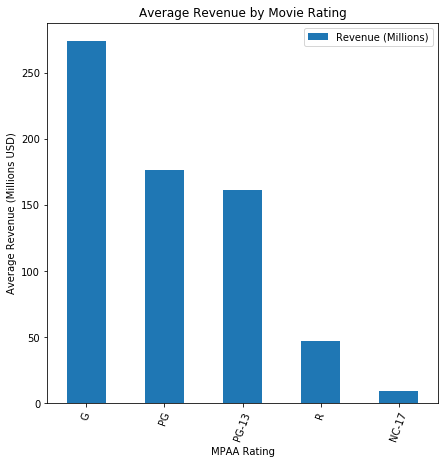

In [16]:
# Get average revenue by rating
dfavgRev_ByRating = df_IMDB.groupby(["Rating"])["Revenue (Millions)"].mean().to_frame()

# Sort the data so comparisons are easier to make
dfavgRev_ByRating = dfavgRev_ByRating.sort_values(by=["Revenue (Millions)"], ascending=False)

# Display the results
# Generate a bar plot showing Average Revenue by Movie Rating
ax = dfavgRev_ByRating.plot.bar(title="Average Revenue by Movie Rating", figsize=(7,7), rot=70)
    
ax.set_xlabel("MPAA Rating")
ax.set_ylabel("Average Revenue (Millions USD)")

# Show the chart
plt.show()

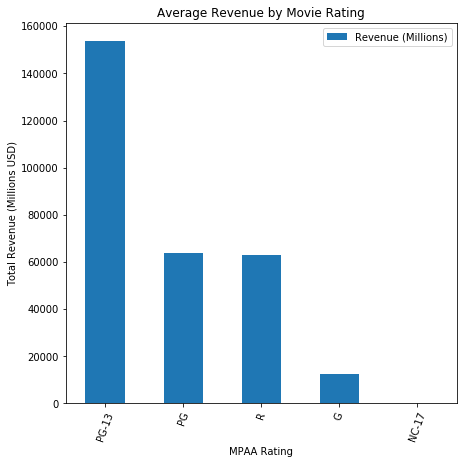

In [18]:
# Get average revenue by rating
dfsumRev_ByRating = df_IMDB.groupby(["Rating"])["Revenue (Millions)"].sum().to_frame()

# Sort the data so comparisons are easier to make
dfsumRev_ByRating = dfsumRev_ByRating.sort_values(by=["Revenue (Millions)"], ascending=False)

# Display the results
# Generate a bar plot showing Average Revenue by Movie Rating
ax = dfsumRev_ByRating.plot.bar(title="Average Revenue by Movie Rating", figsize=(7,7), rot=70)
    
ax.set_xlabel("MPAA Rating")
ax.set_ylabel("Total Revenue (Millions USD)")

# Show the chart
plt.show()

In [32]:
def PlotLinearRegression(x_values, y_values, x_label, y_label, color, y_min, y_max, title, image_name):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

    # Get regression values (mx+b)
    regress_values = x_values * slope + intercept

    # Plot our results
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot()

    ax.scatter(x_values, y_values, c=color, edgecolors="grey", marker="o")
    plt.plot(x_values, regress_values, "b-")

    # Formatting
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax.set_xlim(0, 10)
    ax.grid(True)
    plt.title(title)
    
    if rating == "PG":
        color = "blue"
    elif rating == "PG-13":
        color = "yellow"
    elif rating == "NC-17":
        color = "orange"
    elif rating == "R":
        color = "red"
    elif rating == "NR":
        color = "black"
    else:
        color = "green"
    # end if
    
    # Create our legend data
    g_dots = mlines.Line2D([], [], color="green", marker="o", markersize=10, linestyle="None", label="G")
    blu_dots = mlines.Line2D([], [], color="blue", marker="o", markersize=10, linestyle="None", label="PG")
    y_dots = mlines.Line2D([], [], color="yellow", marker="o", markersize=10, linestyle="None", label="PG-13")
    o_dots = mlines.Line2D([], [], color="orange", marker="o", markersize=10, linestyle="None", label="NC-17")
    r_dots = mlines.Line2D([], [], color="red", marker="o", markersize=10, linestyle="None", label="R")
    
    plt.legend(handles=[g_dots, blu_dots, y_dots, o_dots, r_dots], loc=2)

    # Show the chart
    pvalue = '{:0,.8f}'.format(pvalue)
    rvalue = '{:0,.8f}'.format(rvalue)
    print(f"The P-Value is: {'{:0,.8f}'.format(pvalue)}")
    print(f"The correlation coefficient is: {'{:0,.8f}'.format(rvalue)}")
    
    plt.show()

    # Save our figure
    save_file = os.path.join("..", "Images", "Rev_v_IMDBRating.png")
    fig.savefig(save_file)
# end def

The P-Value is: 0.00000000
The correlation coefficient is: 0.22214872


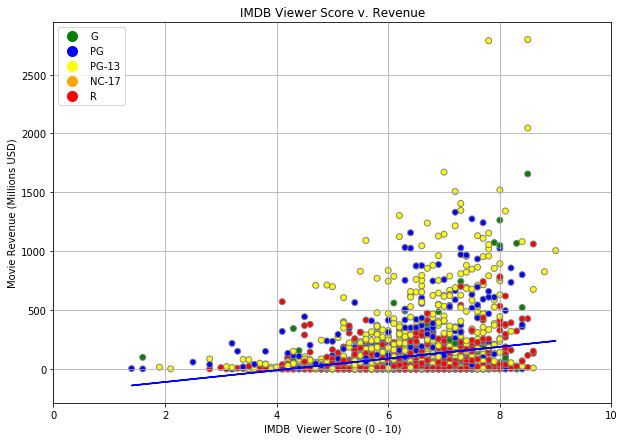

In [33]:
# Call our function to plot the regression chart
PlotLinearRegression(df_IMDB["IMDB Rating"], df_IMDB["Revenue (Millions)"], 
                     "IMDB  Viewer Score (0 - 10)", "Movie Revenue (Millions USD)", df_IMDB["Color"], -0.5, 3.5, 
                     "IMDB Viewer Score v. Revenue", "IMDBViewerScorevRevenue.png")